In [1]:
import psycopg2 as pg2 
import os, sys
import pandas as pd
import glob

/tmp/ipykernel_22096/3147899435.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [18]:
path = "/home/suhani/Documents/TBTFW-THA-027/data/*.csv"
i=0
for fname in glob.glob(path):
    df1 = pd.read_csv(fname)
    df = df1.dropna()
    # df = df.astype({'Date':'string'})
    df['Date'] = pd.to_datetime(df['Date'])
    print(df['Date'].dtype)
    print(df.columns)
    

datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


/tmp/ipykernel_22096/1187226492.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipykernel_22096/1187226492.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [50]:
import psycopg2 as pg2 
import os, sys
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tabulate import tabulate

conn = pg2.connect(database="suhani", user='suhani', password='Suhani@03', host="localhost", port=5432)

cursor = conn.cursor()
companies = ['tsla', 'inr_x', 'tatamotors', 'aapl', 'hdb', 'jiofin', 'mara']
stocks_data={}
for comp in companies:
    cursor.execute(f'select * from {comp};')
    data = cursor.fetchall()
    stocks_data[comp] = data

stocks_df={}
for stock, values in stocks_data.items():
    df1 = pd.DataFrame(values, columns=['date','open','high','low','close', 'adj_close', 'volume'])
    df=df1.dropna()
    stocks_df[stock] = df
    
    cols_to_convert = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
    stocks_df[stock][cols_to_convert] = stocks_df[stock][cols_to_convert].apply(pd.to_numeric, errors='coerce')


print("--------------------------------", stocks_data['aapl'][0])
stocks_df.keys()


-------------------------------- (datetime.date(2023, 2, 21), '150.199997', '151.300003', '148.410004', '148.479996', '147.691666', '58867200')


KeyError: 'position'

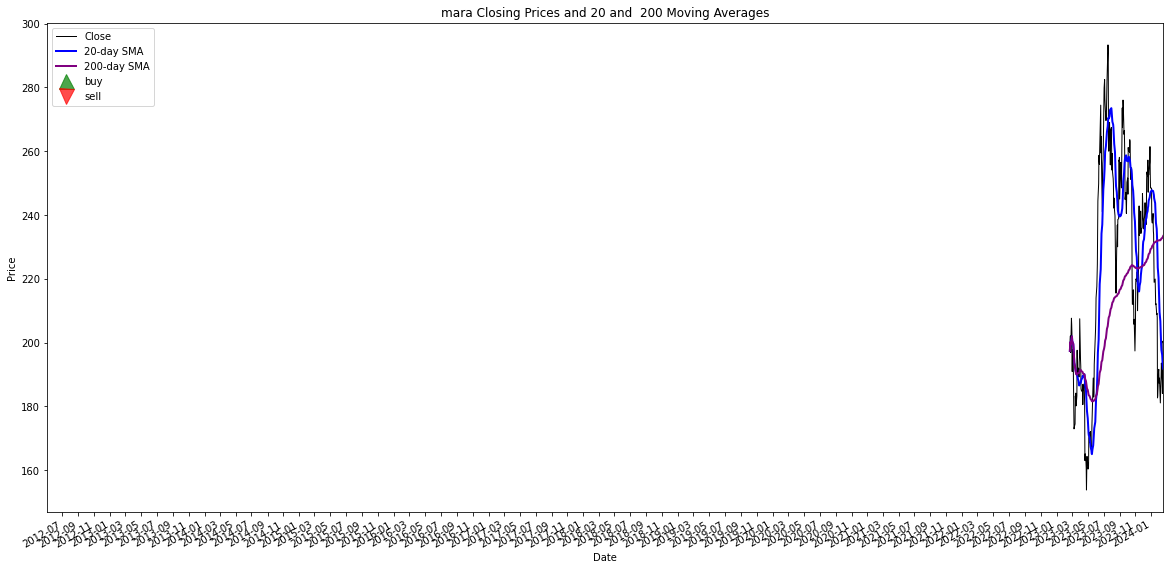

+-----+------------+--------+--------+--------+---------+-------------+-----------+---------------------+----------------------+----------+------------+
|     | date       |   open |   high |    low |   close |   adj_close |    volume |   20_day_moving_avg |   200_day_moving_avg |   signal | position   |
|-----+------------+--------+--------+--------+---------+-------------+-----------+---------------------+----------------------+----------+------------|
|  39 | 2023-04-18 | 187.15 | 187.69 | 183.58 |  184.31 |      184.31 |  92067000 |             190.05  |              189.964 |        1 | Buy        |
|  40 | 2023-04-19 | 179.1  | 183.5  | 177.65 |  180.59 |      180.59 | 125732700 |             189.2   |              189.735 |        0 | Sell       |
|  72 | 2023-06-05 | 217.8  | 221.29 | 214.52 |  217.61 |      217.61 | 151143100 |             184.633 |              183.772 |        1 | Buy        |
| 181 | 2023-11-08 | 223.15 | 224.15 | 217.64 |  222.11 |      222.11 | 106584800 

/tmp/ipykernel_23676/1975012257.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['position'] = df_pos['position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')


,date,open,high,low,close,adj_close,volume,20_day_moving_avg,200_day_moving_avg,signal,position
39,2023-04-18,187.149994,187.690002,183.580002,184.309998,184.309998,92067000,190.049999,189.964000,1,1.0
72,2023-06-05,217.800003,221.289993,214.520004,217.610001,217.610001,151143100,184.633499,183.772192,1,1.0
193,2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800,224.245500,223.845258,1,1.0


<Figure size 432x288 with 0 Axes>

In [51]:
start_date = stocks_df[stock]['date'].iloc[0]
end_date = stocks_df[stock]['date'].iloc[-1]
strategy='SMA'
short_window=20
long_window=200
stock='tsla'
short_wd = str(short_window) + '_day_moving_avg'
long_wd = str(long_window) + '_day_moving_avg'

if strategy == 'SMA':
    stocks_df[stock][short_wd] = stocks_df[stock]['close'].rolling(window=short_window, min_periods=1).mean()
    stocks_df[stock][long_wd] = stocks_df[stock]['close'].rolling(window=long_window, min_periods=1).mean() 

# generate the signal
stocks_df[stock]['signal'] = 0
stocks_df[stock]['signal'] = np.where(stocks_df[stock][short_wd] > stocks_df[stock][long_wd], 1, 0)

stocks_df[stock]['position'] = stocks_df[stock]['signal'].diff()

plt.figure(figsize=(20,10))
plt.plot(stocks_df[stock]['date'], stocks_df[stock]['close'], label='Close', color='black', lw=1)

# Plot smoothed moving averages
plt.plot(stocks_df[stock]['date'], stocks_df[stock]['20_day_moving_avg'], label='20-day SMA', color='blue', lw=2)
plt.plot(stocks_df[stock]['date'], stocks_df[stock]['200_day_moving_avg'], label='200-day SMA', color='purple', lw=2)


plt.plot(stocks_df[stock][stocks_df[stock]['position'] == 1].index, 
            stocks_df[stock][short_wd][stocks_df[stock]['position'] == 1], 
            '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

    # plot 'sell' signals
plt.plot(stocks_df[stock][stocks_df[stock]['position'] == -1].index, 
        stocks_df[stock][short_wd][stocks_df[stock]['position'] == -1], 
        'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')

# Set plot title and labels
plt.title(f'{comp} Closing Prices and {short_window} and  {long_window} Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
# plt.grid(True)

# Format date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gcf().autofmt_xdate()

# Adjust legend position
plt.legend(loc='upper left')
plt.xlim(start_date, end_date)
plt.show()
plt.savefig(f'{stock} {short_window} and  {long_window} Moving Averages Crossover.png')

df_pos = stocks_df[stock][(stocks_df[stock]['position'] == 1) | (stocks_df[stock]['position'] == -1)]
df_pos['position'] = df_pos['position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_pos, headers = 'keys', tablefmt = 'psql'))

stocks_df['tsla'][stocks_df['tsla']['position']==1]